In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np


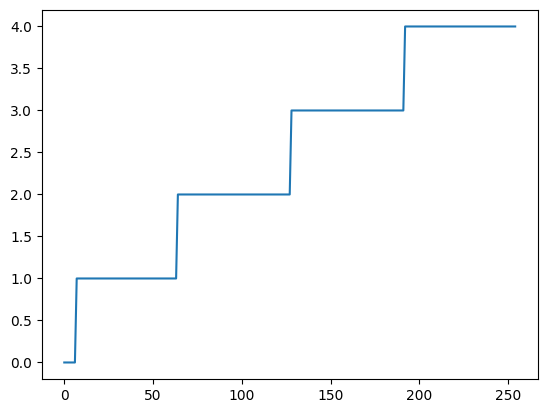

In [2]:
plt.figure(1)
plt.plot([(1+(x>>6)) * (min(255, x*20) >> 7) for x in range(255)])
plt.show()


0.0 1.6
0.0 1.6
0.0 0.44


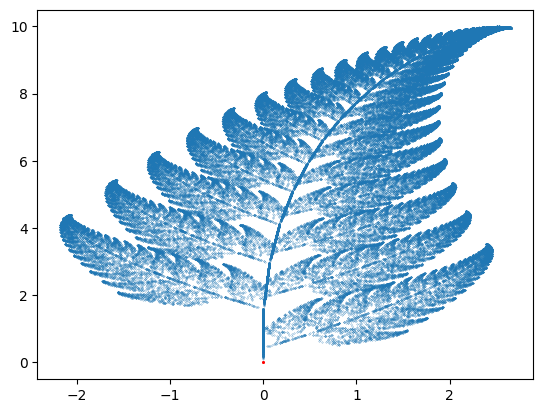

-2.1810141296081698 2.655549800932417
0 9.998188838053332


In [3]:
x = 0
y = 0

xs = []
ys = []

for n in range(110000):
    #xs.append(x+900)
    #ys.append(100+1800*y/3500)
    #xs.append(341*x+1024)
    #ys.append(204.8*y)
    xs.append(x)
    ys.append(y)

    r = random.random()
    if r < 0.01:
        x, y =  0.00 * x + 0.00 * y,  0.00 * x + 0.16 * y + 0.00
    elif r < 0.86:
        x, y =  0.85 * x + 0.04 * y, -0.04 * x + 0.85 * y + 1.60
    elif r < 0.93:
        x, y =  0.20 * x - 0.26 * y,  0.23 * x + 0.22 * y + 1.60
    else:
        x, y = -0.15 * x + 0.28 * y,  0.26 * x + 0.24 * y + 0.44

plt.figure()
plt.plot(xs, ys, 'o', markersize=0.2)
plt.plot(0, 0, 'o', color="red", markersize=1)
x, y =  0.85 * 0 + 0.04 * 0, -0.04 * 0 + 0.85 * 0 + 1.60
print(x,y)
x, y = 0, 0
print(0.20 * x - 0.26 * y,  0.23 * x + 0.22 * y + 1.60)
print(-0.15 * x + 0.28 * y,  0.26 * x + 0.24 * y + 0.44)
plt.plot(x,y, 'o', color="red", markersize=1)
plt.show()
print(min(xs), max(xs))
print(min(ys), max(ys))



In [4]:
2048/6

341.3333333333333

In [5]:
def f(x,y):
    x1, y1 =  0.00 * x + 0.00 * y,  0.00 * x + 0.16 * y + 0.00
    x2, y2 =  0.85 * x + 0.04 * y, -0.04 * x + 0.85 * y + 1.60
    x3, y3 =  0.20 * x - 0.26 * y,  0.23 * x + 0.22 * y + 1.60
    x4, y4 = -0.15 * x + 0.28 * y,  0.26 * x + 0.24 * y + 0.44
    return [[x1,y1],[x2,y2],[x3,y3],[x4,y4]]

def u(x,y, IMAGE_SIZE=2048):
    return (-IMAGE_SIZE/6) * x + IMAGE_SIZE/2,  (IMAGE_SIZE/10) * y

def u_(x,y,IMAGE_SIZE=2048):
    return (-6/IMAGE_SIZE) * (x - IMAGE_SIZE/2),  (10/IMAGE_SIZE) * y

def A(x,y):
    x1, y1 =  0.00 * x + 0.00 * y,  0.00 * x + 0.16 * y
    x2, y2 =  0.85 * x + 0.04 * y, -0.04 * x + 0.85 * y
    x3, y3 =  0.20 * x - 0.26 * y,  0.23 * x + 0.22 * y
    x4, y4 = -0.15 * x + 0.28 * y,  0.26 * x + 0.24 * y
    return [[x1,y1],[x2,y2],[x3,y3],[x4,y4]]

# print(u(0,0))
# print(u(0,1.6))
# print(u(0,0.44))
# A(100, 0)
[x_,y_] = u_(0,0)
[u(x,y) for [x,y] in f(x_, y_)]

[(1024.0, 0.0),
 (153.60000000000014, 303.104),
 (819.2, 468.992),
 (1177.6, 249.856)]

In [6]:
u(f(3,0)[1][0],f(3,0)[1][1])

(153.60000000000014, 303.104)

In [7]:
u(0, 0)


(1024.0, 0.0)

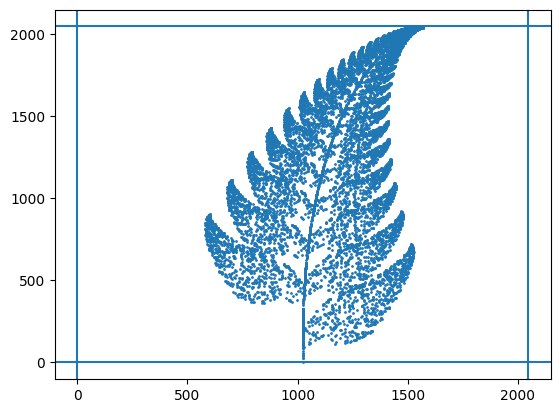

577.7690081412563 1568.699455841908
0 2046.9679717514105


In [8]:
x = 1024
y = 0

xs = []
ys = []

for n in range(11000):
    #xs.append(x+900)
    #ys.append(100+1800*y/3500)
    xs.append(x)
    ys.append(y)


    r = random.random()
    if r < 0.01:
        x, y =  0.00 * x + 0.00 * y + 1024,  0.00 * x + 0.16 * y
    elif r < 0.86:
        x, y =  0.85 * x + 0.04 * y + 154, -0.04 * x + 0.85 * y + 368.64
    elif r < 0.93:
        x, y =  0.20 * x - 0.26 * y + 819,  0.23 * x + 0.22 * y + 92.16000000000005
    else:
        x, y = -0.15 * x + 0.28 * y + 1177.6,  0.26 * x + 0.24 * y -176.128

plt.figure()
plt.plot(xs, ys, 'o', markersize=1)
plt.axhline(2048)
plt.axvline(2048)
plt.axhline(0)
plt.axvline(0)
plt.show()
print(min(xs), max(xs))
print(min(ys), max(ys))



0.38957189936422765 279.35639643094055


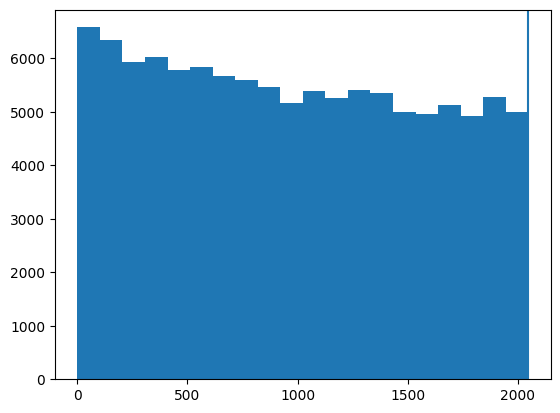

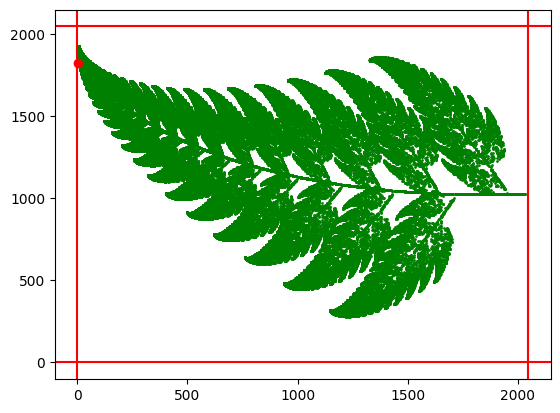

In [9]:
from numpy.linalg import inv

def fern(IMAGE_SIZE=2048):
    point = np.array([IMAGE_SIZE-100, IMAGE_SIZE/2])
    Gamma = np.array([
        [0, -IMAGE_SIZE/10],
        [IMAGE_SIZE/6,   0]
    ])
    Delta = np.array([IMAGE_SIZE, IMAGE_SIZE/2])
    
    A0 = Gamma @ np.array([[0   ,  0    ],[0    ,0.16]]) @ inv(Gamma)
    A1 = Gamma @ np.array([[0.85,  0.04 ],[-0.04,0.85]]) @ inv(Gamma)
    A2 = Gamma @ np.array([[0.20, -0.26], [0.23,0.22]]) @ inv(Gamma)
    A3 = Gamma @ np.array([[-0.15, 0.28], [0.26,0.24]]) @ inv(Gamma)

    B0 = np.array([0, 0   ])
    B1 = np.array([0, 1.60])
    B2 = np.array([0, 1.60])
    B3 = np.array([0, 0.44])

    points = []
    for n in range(110000):
        #xs.append(x+900)
        #ys.append(100+1800*y/3500)
        points.append(point)


        r = random.random()
        if r < 0.01:
            point =  A0 @ (point - Delta) + Gamma @ B0 + Delta
        elif r < 0.86:
            point =  A1 @ (point - Delta) + Gamma @ B1 + Delta
        elif r < 0.93:
            point =  A2 @ (point - Delta) + Gamma @ B2 + Delta
        else:
            point =  A3 @ (point - Delta) + Gamma @ B3 + Delta
    return np.array(points)

IMAGE_SIZE = 2048
x,y = fern().T
print((np.min(x)),np.min(y))
plt.figure()
a = x.copy()
a = 2048 - (13*(2048-a))%2048
plt.hist(a, bins=20)
plt.axvline(IMAGE_SIZE)
plt.figure()
plt.plot(x,y, 'o', markersize=1, color='green')
plt.axhline(IMAGE_SIZE, color='red')
plt.axvline(IMAGE_SIZE, color='red')
plt.plot(1, 1828, 'o', color='red')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.show()

In [10]:
Gamma = np.array([
    [0, -IMAGE_SIZE/10],
    [IMAGE_SIZE/6,   0]
])
Delta = np.array([IMAGE_SIZE, IMAGE_SIZE/2])

A0 = Gamma @ np.array([[0   ,  0    ],[0    ,0.16]]) @ inv(Gamma)
A1 = Gamma @ np.array([[0.85,  0.04 ],[-0.04,0.85]]) @ inv(Gamma)
A2 = Gamma @ np.array([[0.20, -0.26], [0.23,0.22]]) @ inv(Gamma)
A3 = Gamma @ np.array([[-0.15, 0.28], [0.26,0.24]]) @ inv(Gamma)

B0 = np.array([0, 0   ])
B1 = np.array([0, 1.60])
B2 = np.array([0, 1.60])
B3 = np.array([0, 0.44])

In [11]:
point = np.array([2048, 1024])
print(A0 @ (point - Delta) + Gamma @ B0 + Delta)
print(A1 @ (point - Delta) + Gamma @ B1 + Delta)
print(A2 @ (point - Delta) + Gamma @ B2 + Delta)
print(A3 @ (point - Delta) + Gamma @ B3 + Delta)

[2048. 1024.]
[1720.32 1024.  ]
[1720.32 1024.  ]
[1957.888 1024.   ]


In [12]:
point = np.array([0, 0])
print(A0 @ (point - Delta) + Gamma @ B0 + Delta)
print(A1 @ (point - Delta) + Gamma @ B1 + Delta)
print(A2 @ (point - Delta) + Gamma @ B2 + Delta)
print(A3 @ (point - Delta) + Gamma @ B3 + Delta)

[1720.32 1024.  ]
[-45.056      290.13333333]
[1411.072       -68.26666667]
[1626.112      2133.33333333]


In [13]:
print(A0, end='\n\n')
print(A1, end='\n\n')
print(A2, end='\n\n')
print(A3, end='\n\n')

[[0.16 0.  ]
 [0.   0.  ]]

[[ 0.85        0.024     ]
 [-0.06666667  0.85      ]]

[[ 0.22       -0.138     ]
 [ 0.43333333  0.2       ]]

[[ 0.24       -0.156     ]
 [-0.46666667 -0.15      ]]



In [14]:
print(A0 @ np.array([6, 1756]))
print(A1 @ np.array([6, 1756]))
print(A2 @ np.array([6, 1756]))
print(A3 @ np.array([6, 1756]))

[0.96 0.  ]
[  47.244 1492.2  ]
[-241.008  353.8  ]
[-272.496 -266.2  ]


In [15]:
bloc = np.array([
    [-3, 10, 1],
    [-3,  0, 1],
    [ 3, 10, 1],
])

bloc_ = inv(bloc)
bloc_

array([[-0.16666667, -0.        ,  0.16666667],
       [ 0.1       , -0.1       ,  0.        ],
       [-0.5       ,  1.        ,  0.5       ]])

In [16]:
# a, b, e
abe = bloc_ @ np.array([100, 1948, 100])
# print(abe)
# c, d, f
cdf = bloc_ @ np.array([100, 100, 1948])
# print(cdf)

Gamma2 = np.array([
    [abe[0], abe[1]],
    [cdf[0], cdf[1]],
])
print(np.round(Gamma2))

Delta = np.array([abe[2], cdf[2]])

print(np.round(Gamma))

print(Delta)

[[   0. -185.]
 [ 308.    0.]]
[[   0. -205.]
 [ 341.    0.]]
[1948. 1024.]


In [17]:
np.set_printoptions(precision=4, suppress=True, )

In [18]:
Gamma = Gamma2
A0 = Gamma @ np.array([[0   ,  0    ],[0    ,0.16]]) @ inv(Gamma)
A1 = Gamma @ np.array([[0.85,  0.04 ],[-0.04,0.85]]) @ inv(Gamma)
A2 = Gamma @ np.array([[0.20, -0.26], [0.23,0.22]]) @ inv(Gamma)
A3 = Gamma @ np.array([[-0.15, 0.28], [0.26,0.24]]) @ inv(Gamma)

point = np.array([0, 0])
print(A0 @ (point - Delta) + Gamma @ B0 + Delta)
print(A0, end='\n\n')
print(A1 @ (point - Delta) + Gamma @ B1 + Delta)
print(A1, end='\n\n')
print(A2 @ (point - Delta) + Gamma @ B2 + Delta)
print(A2, end='\n\n')
print(A3 @ (point - Delta) + Gamma @ B3 + Delta)
print(A3, end='\n\n')


[1636.32 1024.  ]
[[ 0.16 -0.  ]
 [-0.    0.  ]]

[-28.056  283.4667]
[[ 0.85    0.024 ]
 [-0.0667  0.85  ]]

[1365.072   -24.9333]
[[ 0.22   -0.138 ]
 [ 0.4333  0.2   ]]

[1558.912  2086.6667]
[[ 0.24   -0.156 ]
 [-0.4667 -0.15  ]]



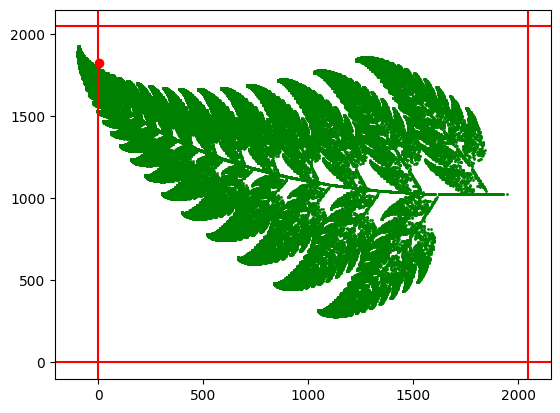

In [19]:
def fern(IMAGE_SIZE=2048):
    point = np.array([IMAGE_SIZE-100, IMAGE_SIZE/2])
    Gamma = np.array([
        [ 0.     , -204.8],
        [ 341.333, 0.    ]
    ])
    Delta = np.array([1948., 1024.])
    
    A0 = Gamma @ np.array([[0   ,  0    ],[0    ,0.16]]) @ inv(Gamma)
    A1 = Gamma @ np.array([[0.85,  0.04 ],[-0.04,0.85]]) @ inv(Gamma)
    A2 = Gamma @ np.array([[0.20, -0.26], [0.23,0.22]]) @ inv(Gamma)
    A3 = Gamma @ np.array([[-0.15, 0.28], [0.26,0.24]]) @ inv(Gamma)

    B0 = np.array([0, 0   ])
    B1 = np.array([0, 1.60])
    B2 = np.array([0, 1.60])
    B3 = np.array([0, 0.44])

    points = []
    for n in range(110000):
        #xs.append(x+900)
        #ys.append(100+1800*y/3500)
        points.append(point)


        r = random.random()
        if r < 0.01:
            point =  A0 @ (point - Delta) + Gamma @ B0 + Delta
        elif r < 0.86:
            point =  A1 @ (point - Delta) + Gamma @ B1 + Delta
        elif r < 0.93:
            point =  A2 @ (point - Delta) + Gamma @ B2 + Delta
        else:
            point =  A3 @ (point - Delta) + Gamma @ B3 + Delta
    return np.array(points)

IMAGE_SIZE = 2048
x,y = fern().T
plt.figure()
plt.plot(x,y, 'o', markersize=1, color='green')
plt.axhline(IMAGE_SIZE, color='red')
plt.axvline(IMAGE_SIZE, color='red')
plt.plot(1, 1828, 'o', color='red')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.show()

# AAAAAAAAAAAAAAAAAAAAAAAAA


[[   0. -185.]
 [ 308.    0.]]
A0 [[ 0.16 -0.  ]
 [-0.    0.  ]]
Delta  [1636.32 1024.  ]


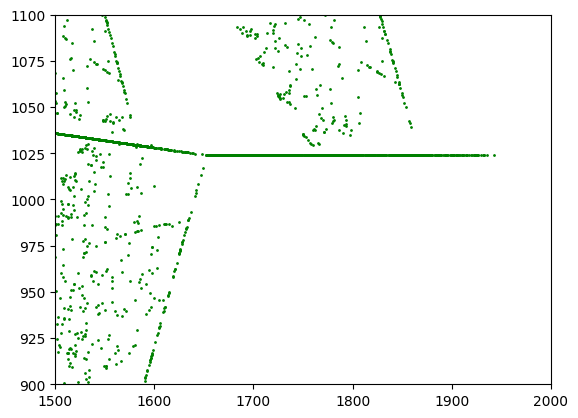

In [24]:
bloc = np.array([
    [-3, 10, 1],
    [-3,  0, 1],
    [ 3, 10, 1],
])

bloc_ = inv(bloc)

# a, b, e
abe = bloc_ @ np.array([100, 1948, 100])
# print(abe)
# c, d, f
cdf = bloc_ @ np.array([100, 100, 1948])
# print(cdf)

Gamma = np.array([
    [abe[0], abe[1]],
    [cdf[0], cdf[1]],
])
# print(np.round(Gamma))

Delta = np.array([abe[2], cdf[2]])

# print(Delta)

A0 = Gamma @ np.array([[0   ,  0    ],[0    ,0.16]]) @ inv(Gamma)
A1 = Gamma @ np.array([[0.85,  0.04 ],[-0.04,0.85]]) @ inv(Gamma)
A2 = Gamma @ np.array([[0.20, -0.26], [0.23,0.22]]) @ inv(Gamma)
A3 = Gamma @ np.array([[-0.15, 0.28], [0.26,0.24]]) @ inv(Gamma)

B0 = np.array([0, 0   ])
B1 = np.array([0, 1.60])
B2 = np.array([0, 1.60])
B3 = np.array([0, 0.44])

# print("XDDDDDDDDDDDDDDDDDDDDDDDDD")
# point = np.array([1948, 1024])
# print(A0 @ (point - Delta) + Gamma @ B0 + Delta)
# print(A1 @ (point - Delta) + Gamma @ B1 + Delta)
# print(A2 @ (point - Delta) + Gamma @ B2 + Delta)
# print(A3 @ (point - Delta) + Gamma @ B3 + Delta)
# print("XDDDDDDDDDDDDDDDDDDDDDDDDD")

# print("XDDDDDDD\nXDDDDDDD\nXDDDDDDD\nXDDDDDDD\n")
# point = np.array([0, 0])
# print(A0 @ (point - Delta) + Gamma @ B0 + Delta)
# print(np.round(A0, 3), end='\n\n')
# print(A1 @ (point - Delta) + Gamma @ B1 + Delta)
# print(np.round(A1, 3), end='\n\n')
# print(A2 @ (point - Delta) + Gamma @ B2 + Delta)
# print(np.round(A2, 3), end='\n\n')
# print(A3 @ (point - Delta) + Gamma @ B3 + Delta)
# print(np.round(A3, 3), end='\n\n')
# print("XDDDDDDD\nXDDDDDDD\nXDDDDDDD\nXDDDDDDD\n")


def fern(IMAGE_SIZE=2048):
    point = np.array([IMAGE_SIZE-100, IMAGE_SIZE/2])
    point = np.array([0, 0])
    bloc = np.array([
        [-3, 10, 1],
        [-3,  0, 1],
        [ 3, 10, 1],
    ])

    bloc_ = inv(bloc)

    # a, b, e
    abe = bloc_ @ np.array([100, 1948, 100])
    # print(abe)
    # c, d, f
    cdf = bloc_ @ np.array([100, 100, 1948])
    # print(cdf)

    Gamma = np.array([
        [abe[0], abe[1]],
        [cdf[0], cdf[1]],
    ])
    print(np.round(Gamma))

    Delta = np.array([abe[2], cdf[2]])
    
    A0 = Gamma @ np.array([[0   ,  0    ],[0    ,0.16]]) @ inv(Gamma)
    A1 = Gamma @ np.array([[0.85,  0.04 ],[-0.04,0.85]]) @ inv(Gamma)
    A2 = Gamma @ np.array([[0.20, -0.26], [0.23,0.22]]) @ inv(Gamma)
    A3 = Gamma @ np.array([[-0.15, 0.28], [0.26,0.24]]) @ inv(Gamma)

    print("A0", A0)
    print("Delta ", A0 @ (point - Delta) + Gamma @ B0 + Delta)

    points = []
    for n in range(110000):
        #xs.append(x+900)
        #ys.append(100+1800*y/3500)
        points.append(point)


        r = random.random()
        if r < 0.01:
            point =  A0 @ (point - Delta) + Gamma @ B0 + Delta
        elif r < 0.86:
            point =  A1 @ (point - Delta) + Gamma @ B1 + Delta
        elif r < 0.93:
            point =  A2 @ (point - Delta) + Gamma @ B2 + Delta
        else:
            point =  A3 @ (point - Delta) + Gamma @ B3 + Delta
    return np.array(points)

IMAGE_SIZE = 2048
x,y = fern().T
plt.figure()
plt.plot(x,y, 'o', markersize=1, color='green')
plt.axhline(IMAGE_SIZE, color='red')
plt.axvline(IMAGE_SIZE, color='red')
plt.axhline(0, color='red')
plt.axvline(0, color='red')

plt.xlim(1500, 2000)
plt.ylim(900, 1100)
plt.show()